In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, LabelEncoder

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split


# 일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.

# 또한, cross_val_score 함수에는 KFold의 매개변수를 제어할 수가 없으므로, 

# 따로 KFold 객체를 만들고 매개변수를 조정한 다음에 cross_val_score의 cv 매개변수에 넣어야 한다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, make_scorer, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 전처리된 데이터, 테스트셋 불러오기

In [3]:
df_train= pd.read_csv('./train_dummies.csv')

In [19]:
df_test = pd.read_csv('./test_dummies.csv')

In [4]:
df_train.head()

,age,balance,day,month,campaign,pdays,previous,y,default_yes,housing_yes,loan_yes,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_other,poutcome_success,poutcome_unknown,marital_married,marital_single
0,57,2299,12,11,3,-1,0,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,31,246,16,5,2,-1,0,False,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,58,1230,20,5,1,87,1,True,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,32,569,29,1,1,-1,0,False,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
4,54,0,15,7,4,-1,0,False,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [5]:
y = df_train['y']
y.shape

(22605,)

In [6]:
X = df_train.drop(['y'], axis=1)
X.shape

(22605, 31)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [8]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(18084, 31), 테스트 세트 Shape:(4521, 31)
 학습 세트 레이블 값 분포 비율
False    0.88111
True     0.11889
Name: y, dtype: float64

 테스트 세트 레이블 값 분포 비율
False    0.881221
True     0.118779
Name: y, dtype: float64


In [9]:
import sklearn.metrics as metrics

In [10]:
# Light GBM

lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
lgbm_clf.fit(X_train, y_train)
lgbm_clf_pred = lgbm_clf.predict(X_test)

lgbm_clf_cv_pre = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
lgbm_clf_cv_rec = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
lgbm_clf_cv_f1 = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Light GBM is ', metrics.precision_score(lgbm_clf_pred, y_test))
print('Recall for Light GBM is ', metrics.recall_score(lgbm_clf_pred, y_test))
print('F1_score for Light GBM is ', metrics.f1_score(lgbm_clf_pred, y_test))
print()
print('The cross validated precision for Light GBM is:', lgbm_clf_cv_pre.mean())
print('The cross validated recall for Light GBM is:', lgbm_clf_cv_rec.mean())
print('The cross validated f1_score for Light GBM is:', lgbm_clf_cv_f1.mean())

Precision for Light GBM is  0.2737430167597765
Recall for Light GBM is  0.57421875
F1_score for Light GBM is  0.3707440100882724

The cross validated precision for Light GBM is: 0.5402500828327709
The cross validated recall for Light GBM is: 0.2311627906976744
The cross validated f1_score for Light GBM is: 0.32324843533820735


In [11]:
# 적절한 임계점 찾기.

pred_proba = lgbm_clf.predict_proba(X_test)
pred  = lgbm_clf.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.98418906 0.01581094]
 [0.9682977  0.0317023 ]
 [0.99368156 0.00631844]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.98418906 0.01581094 0.98418906 0.01581094]
 [0.9682977  0.0317023  0.9682977  0.0317023 ]
 [0.99368156 0.00631844 0.99368156 0.00631844]]


In [12]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1_score = metrics.f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1_score: {2: 4f}'.format(accuracy , precision ,recall, f1_score))

In [13]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.

custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용.

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3875  109]
 [ 390  147]]
정확도: 0.8896, 정밀도: 0.5742, 재현율: 0.2737, F1_score:  0.273743


In [14]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf.predict_proba(X_test)[:, 1]

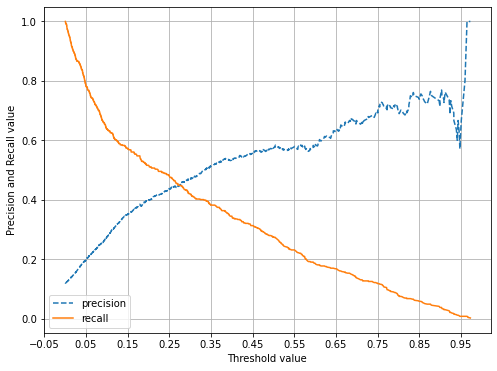

In [15]:
# 임계점 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf.predict_proba(X_test)[:, 1] )


In [16]:
# F1_score가 최대가 되는 임계점 찾는 함수.

def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf, X_test, y_test)

(0.248, 0.4586)

In [17]:
# Binarizer의 베스트 threshold 설정값 지정. 

custom_threshold = 0.248
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3647  337]
 [ 277  260]]
정확도: 0.8642, 정밀도: 0.4355, 재현율: 0.4842, F1_score:  0.484171


In [21]:
# kaggle 제출파일 생성.

pred_proba_1 = lgbm_clf.predict_proba(df_test)
binarizer_pred = Binarizer(threshold=custom_threshold).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./nosampling_nonhypertunning_0.248.csv', index = False)

## 하이퍼파라미터 튜닝 - GridsearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트를 위한 조합 할당.

params = {'num_leaves': [8 ,16 ,32, 64],
          'max_depth':[16, 32, 64, 128, 160],
          'min_child_samples':[20, 60, 100],
          'subsample':[0.2, 0.4, 0.6, 0.8, 1],
         'n_estimators':[100,300,500,700,900,1200]}



gridcv = GridSearchCV(lgbm_clf, param_grid=params, n_jobs=-1, cv=3)

In [23]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

[1]	training's binary_logloss: 0.351603	valid_1's binary_logloss: 0.350569
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.342567	valid_1's binary_logloss: 0.341092
[3]	training's binary_logloss: 0.336471	valid_1's binary_logloss: 0.334895
[4]	training's binary_logloss: 0.331002	valid_1's binary_logloss: 0.329378
[5]	training's binary_logloss: 0.326846	valid_1's binary_logloss: 0.325206
[6]	training's binary_logloss: 0.323678	valid_1's binary_logloss: 0.322168
[7]	training's binary_logloss: 0.320953	valid_1's binary_logloss: 0.319665
[8]	training's binary_logloss: 0.31867	valid_1's binary_logloss: 0.317424
[9]	training's binary_logloss: 0.316745	valid_1's binary_logloss: 0.315637
[10]	training's binary_logloss: 0.315092	valid_1's binary_logloss: 0.314041
[11]	training's binary_logloss: 0.313555	valid_1's binary_logloss: 0.312816
[12]	training's binary_logloss: 0.312295	valid_1's binary_logloss: 0.311782
[13]	training's binary_logloss: 0.310

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [16, 32, 64, 128, 160],
                         'min_child_samples': [20, 60, 100],
                         'n_estimators': [100, 300, 500, 700, 900, 1200],
                         'num_leaves': [8, 16, 32, 64],
                         'subsample': [0.2, 0.4, 0.6, 0.8, 1]})

In [24]:
gridcv.best_estimator_

LGBMClassifier(max_depth=16, num_leaves=8, subsample=0.2)

In [25]:
lgbm_clf_best = LGBMClassifier(max_depth=16, num_leaves=8, subsample=0.2)

In [26]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=16, num_leaves=8, subsample=0.2)

In [27]:
# 적절한 임계점 찾기

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.91594778 0.08405222]
 [0.94047594 0.05952406]
 [0.96857104 0.03142896]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.91594778 0.08405222 0.91594778 0.08405222]
 [0.94047594 0.05952406 0.94047594 0.05952406]
 [0.96857104 0.03142896 0.96857104 0.03142896]]


In [28]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3919   65]
 [ 414  123]]
정확도: 0.8940, 정밀도: 0.6543, 재현율: 0.2291, F1_score:  0.229050


In [29]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1]

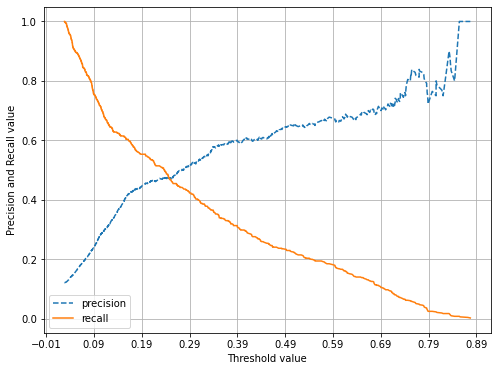

In [30]:
# 임계점 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [31]:
# 가장 높은 F1_score를 가지는 임계점 찾기

def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.197, 0.4987)

In [32]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.197
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3627  357]
 [ 240  297]]
정확도: 0.8679, 정밀도: 0.4541, 재현율: 0.5531, F1_score:  0.553073


In [33]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_best.predict_proba(df_test)
binarizer_pred = Binarizer(threshold=custom_threshold).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./nosampling_gridhypertunning_0.197.csv', index = False)

# 하이퍼파라미터 튜닝 - RandomizedGridsearch

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [1,2,3,4,5,6,7,8,9,10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}


In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.7min finished


LGBMClassifier(bootstrap=False, max_depth=10, max_features='auto',
               min_samples_leaf=3, min_samples_split=4)


In [36]:
lgb_random_best = LGBMClassifier(bootstrap=False, max_depth=10, max_features='auto',
               min_samples_leaf=3, min_samples_split=4)

In [37]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=False, max_depth=10, max_features='auto',
               min_samples_leaf=3, min_samples_split=4)

In [38]:
# 적절한 임계값 찾기

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.94245854 0.05754146]
 [0.9447543  0.0552457 ]
 [0.97535609 0.02464391]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.94245854 0.05754146 0.94245854 0.05754146]
 [0.9447543  0.0552457  0.9447543  0.0552457 ]
 [0.97535609 0.02464391 0.97535609 0.02464391]]


In [39]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3898   86]
 [ 403  134]]
정확도: 0.8918, 정밀도: 0.6091, 재현율: 0.2495, F1_score:  0.249534


In [40]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1]

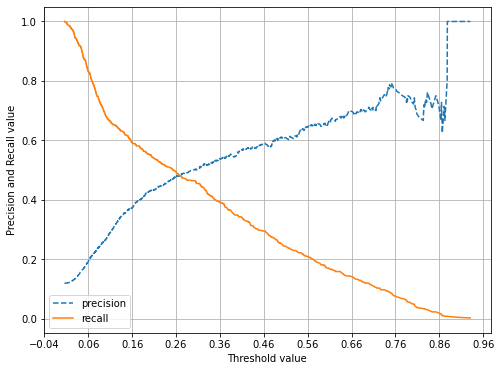

In [41]:
# 임계점 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [42]:
# F1_score가 최대인 임계값 찾기

def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.251, 0.4874)

In [43]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.251
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3680  304]
 [ 266  271]]
정확도: 0.8739, 정밀도: 0.4713, 재현율: 0.5047, F1_score:  0.504655


In [44]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgb_random_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=custom_threshold).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./nosampling_randomhypertunning_0.251.csv', index = False)

### BaysianOptimization을 이용한 하이퍼 파라미터 튜닝

 - 하이퍼 파라미터 튜닝 대상을 Dictionary 형태로 정의.(이때 개별 하이퍼 파라미터는 튜플형태의 범위값으로 주어짐.) 
 - 예를 들어 num_leaves의 값을 24~45 사이의 값을 입력하려면 'num_leaves':(24, 45)로 부여해야 합니다. 
    
 - 이 때 유의해야 할 사항은 num_leaves는 정수형값만 가능한 하이퍼 파라미터임에도 불구하고 BaysianOptimization 클래스가 해당 파라미터의 범위값을 입력 받으면 이를 무조건 정수형이 아닌 실수형 값으로 인식하여 값을 추출하는 것. 
 - 즉 24.5, 25.4, 30.2, 27.2 와 같이 실수형 값을 num_leaves 값으로 설정하려고 시도하는데, 이는 실행 오류를 발생시킴.
---
 - 이러한 실행 오류를 막기 위해서는 호출되는 BayesianOptimization 평가 함수내에서 XGBoost/LightGBM의 하이퍼 파라미터를 다시 정수형 값으로 변경시켜야함. 

In [45]:
bayes_params = {
    'num_leaves': (8, 60),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 24),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

테스트 해볼 하이퍼 파라미터의 범위 값을 설정하였으면 BaysianOptimization에서 호출하여 모델을 최적화하는 함수를 만들어 보겠습니다.

해당 함수는 BaysianOptimization에서 하이퍼 파라미터를 튜닝하기 위해 호출되면 제대로 튜닝이 되고 있는지를 판단하기 위해서 모델을 학습/평가하고 이에 따른 평가 지표를 반환하는 형식으로 만들어집니다. 이 평가 함수는 BayesianOptimization 객체에서 파라미터를 변경하면서 호출되므로 함수의 인자로 앞에서 딕셔너리로 설정된 파라미터들을 가지게 됩니다.

In [46]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

BayesianOptimization 객체를 생성합니다. 이때 생성 인자로 앞에서 만든 평가함수 lgb_roc_eval 함수와 튜닝할 하이퍼 파라미터의 범위값을 설정한 딕셔너리 변수인 bayes_params를 입력합니다.

In [47]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [48]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 30, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 18, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.786526	valid_0's binary_logloss: 0.297536
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.786526	valid_0's binary_logloss: 0.297536
best_iter: 100
roc_auc: 0.7865257585275927
|  1        |  0.7865   |  0.7744   |  18.3     |  32.12    |  0.05494  |  30.03    |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200,

params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 26, 'colsample_bytree': 0.9963415847423831, 'subsample': 0.8576257010583855, 'max_depth': 24, 'reg_alpha': 0.009330048227644716, 'reg_lambda': 0.019604314288185376, 'min_split_gain': 0.04155948070314624, 'min_child_weight': 5.033169891354441, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.79008	valid_0's binary_logloss: 0.293743
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.79008	valid_0's binary_logloss: 0.293743
best_iter: 100
roc_auc: 0.7900795453695602
|  11       |  0.7901   |  0.9963   |  23.55    |  5.033    |  0.04156  |  26.25    |  0.00933  |  0.0196   |  0.8576   |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 40, 'colsample_bytree': 0.5998627886274677, 'subsample': 0.7790153334402677, 'max_depth': 16, 'reg_alpha': 0.4837187250801441, 'reg_lambda': 0.12255728703521324, 'min_split_gain': 0.07631095956670397, 'min_

BayesianOptimization 객체의 max 속성은 최고 높은 성능 Metric를 가질때의 하이퍼 파라미터 값을 가지고 있음.

In [49]:
BO_lgb.max

{'target': 0.7938742867185689,
 'params': {'colsample_bytree': 0.7356842192338882,
  'max_depth': 17.30954475028242,
  'min_child_weight': 7.119487834232308,
  'min_split_gain': 0.01117492426470033,
  'num_leaves': 25.313572860947055,
  'reg_alpha': 0.2961579552042799,
  'reg_lambda': 0.3999811629251122,
  'subsample': 0.9901003782747588}}

In [50]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.72753	valid_0's binary_logloss: 0.361324
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.763769	valid_0's binary_logloss: 0.358451
[3]	valid_0's auc: 0.768982	valid_0's binary_logloss: 0.355442
[4]	valid_0's auc: 0.775028	valid_0's binary_logloss: 0.353024
[5]	valid_0's auc: 0.778089	valid_0's binary_logloss: 0.350886
[6]	valid_0's auc: 0.777496	valid_0's binary_logloss: 0.348786
[7]	valid_0's auc: 0.775357	valid_0's binary_logloss: 0.346971
[8]	valid_0's auc: 0.77765	valid_0's binary_logloss: 0.344554
[9]	valid_0's auc: 0.777541	valid_0's binary_logloss: 0.342311
[10]	valid_0's auc: 0.777405	valid_0's binary_logloss: 0.340797
[11]	valid_0's auc: 0.778126	valid_0's binary_logloss: 0.33874
[12]	valid_0's auc: 0.778584	valid_0's binary_logloss: 0.33753
[13]	valid_0's auc: 0.778891	valid_0's binary_logloss: 0.335669
[14]	valid_0's auc: 0.780625	valid_0's binary_logloss: 0.334182
[15]	valid_0's auc: 0.780927	valid_0's binary_logloss: 

[171]	valid_0's auc: 0.796728	valid_0's binary_logloss: 0.287352
[172]	valid_0's auc: 0.796714	valid_0's binary_logloss: 0.287361
[173]	valid_0's auc: 0.796601	valid_0's binary_logloss: 0.287358
[174]	valid_0's auc: 0.79671	valid_0's binary_logloss: 0.28735
[175]	valid_0's auc: 0.796818	valid_0's binary_logloss: 0.287285
[176]	valid_0's auc: 0.7969	valid_0's binary_logloss: 0.287254
[177]	valid_0's auc: 0.797003	valid_0's binary_logloss: 0.287249
[178]	valid_0's auc: 0.796994	valid_0's binary_logloss: 0.287231
[179]	valid_0's auc: 0.797045	valid_0's binary_logloss: 0.287177
[180]	valid_0's auc: 0.797102	valid_0's binary_logloss: 0.287137
[181]	valid_0's auc: 0.797064	valid_0's binary_logloss: 0.287132
[182]	valid_0's auc: 0.797003	valid_0's binary_logloss: 0.287134
[183]	valid_0's auc: 0.797122	valid_0's binary_logloss: 0.287071
[184]	valid_0's auc: 0.797019	valid_0's binary_logloss: 0.287095
[185]	valid_0's auc: 0.796998	valid_0's binary_logloss: 0.287093
[186]	valid_0's auc: 0.79693	

[306]	valid_0's auc: 0.798267	valid_0's binary_logloss: 0.285957
[307]	valid_0's auc: 0.798186	valid_0's binary_logloss: 0.28598
[308]	valid_0's auc: 0.798333	valid_0's binary_logloss: 0.28593
[309]	valid_0's auc: 0.798327	valid_0's binary_logloss: 0.285936
[310]	valid_0's auc: 0.798275	valid_0's binary_logloss: 0.285931
[311]	valid_0's auc: 0.798302	valid_0's binary_logloss: 0.285949
[312]	valid_0's auc: 0.798266	valid_0's binary_logloss: 0.285968
[313]	valid_0's auc: 0.798255	valid_0's binary_logloss: 0.285993
[314]	valid_0's auc: 0.798254	valid_0's binary_logloss: 0.28601
[315]	valid_0's auc: 0.798224	valid_0's binary_logloss: 0.286038
[316]	valid_0's auc: 0.798175	valid_0's binary_logloss: 0.286046
[317]	valid_0's auc: 0.798191	valid_0's binary_logloss: 0.286053
[318]	valid_0's auc: 0.798148	valid_0's binary_logloss: 0.286065
[319]	valid_0's auc: 0.79823	valid_0's binary_logloss: 0.286019
[320]	valid_0's auc: 0.798347	valid_0's binary_logloss: 0.285991
[321]	valid_0's auc: 0.798467

ROC AUC: 0.7988


In [51]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.7356842192338882, learning_rate=0.02,
               max_depth=17, min_child_weight=7.119487834232308,
               min_split_gain=0.01117492426470033, n_estimators=1000,
               num_leaves=25, reg_alpha=0.2961579552042799,
               reg_lambda=0.3999811629251122, subsample=0.9901003782747588)

In [52]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7356842192338882, learning_rate=0.02,
               max_depth=17, min_child_weight=7.119487834232308,
               min_split_gain=0.01117492426470033, n_estimators=1000,
               num_leaves=25, reg_alpha=0.2961579552042799,
               reg_lambda=0.3999811629251122, subsample=0.9901003782747588)

In [53]:
# 최적의 임계값 찾기

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (4521, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.94498019 0.05501981]
 [0.95106638 0.04893362]
 [0.97956108 0.02043892]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.94498019 0.05501981 0.91594778 0.08405222]
 [0.95106638 0.04893362 0.94047594 0.05952406]
 [0.97956108 0.02043892 0.96857104 0.03142896]]


In [54]:


from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[3898   86]
 [ 390  147]]
정확도: 0.8947, 정밀도: 0.6309, 재현율: 0.2737, F1_score:  0.273743


In [55]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###

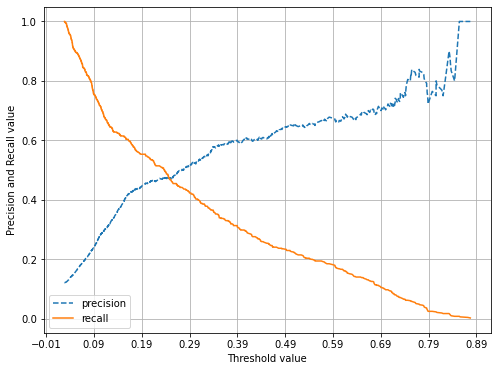

In [56]:
# 임계값 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [57]:
# F1_score가 최대인 임계값 찾기

def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.213, 0.4908)

In [58]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.213
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[3620  364]
 [ 244  293]]
정확도: 0.8655, 정밀도: 0.4460, 재현율: 0.5456, F1_score:  0.545624


In [59]:
test = pd.read_csv('./test_dummies.csv')
pred_proba_1 = lgbm_clf_bayes_best.predict_proba(test)
binarizer_pred = Binarizer(threshold=custom_threshold).transform(pred_proba_1[:,1].reshape(-1,1)) 
binarizer_pred = binarizer_pred.reshape(-1,)
submit = pd.read_csv('./sample_submission.csv')
submit['y'] = binarizer_pred
submit['y'] = submit.y.astype('bool')
submit.to_csv('./nosampling_bayeshypertunning_0.213.csv', index = False)

# sampling기법 적용하여 이어서 진행.